In [1]:
from FinMind.Data import Load
import numpy as np 
#import pandas as pd
import math
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
from keras.layers.core import Dense, Dropout
from keras.layers import LSTM , GRU, normalization
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from keras.optimizers import Adam 
TaiwanStockInfo = Load.FinData(dataset = 'TaiwanStockInfo')

def input_data(a,colname):
    print('input data')
    data = Load.FinData(
        dataset = 'TaiwanStockPrice',
        select = str(a),
        date = '2018-11-01')

    #colname = ['date', 'open', 'max', 'min', 'close', 'Trading_Volume']
    #data = data[colname]
    print('select ',str(a), ' ',colname, ' price')
    date = [ str(d) for d in data['date'] ]
    stock_price = data[colname].values.astype('float32')
    stock_price = stock_price.reshape(len(stock_price), 1)

    print(' 畫圖 ')
    plt.plot(stock_price)
    plt.show()
    
    print(' 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 ')
    train_size = int(len(stock_price) * 0.8)
    test_size = len(stock_price) - train_size
    test_size = train_size + int(test_size/2)
    valid_size = test_size

    train = stock_price[:train_size,:]
    test = stock_price[train_size:test_size,:]
    valid = stock_price[valid_size:,:]

    train_date = date[:train_size]
    test_date = date[train_size:test_size]
    valid_date = date[valid_size:]
    return train, test

def process_data(data , n_features,future_days):
    print('切 data')
    dataX, dataY = [], []
    for i in range(len(data)-n_features-future_days):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features-1+future_days, 0])
    return np.array(dataX), np.array(dataY)


print('OK')

Using plaidml.keras.backend backend.


OK


input data
select  3481   max  price
 畫圖 


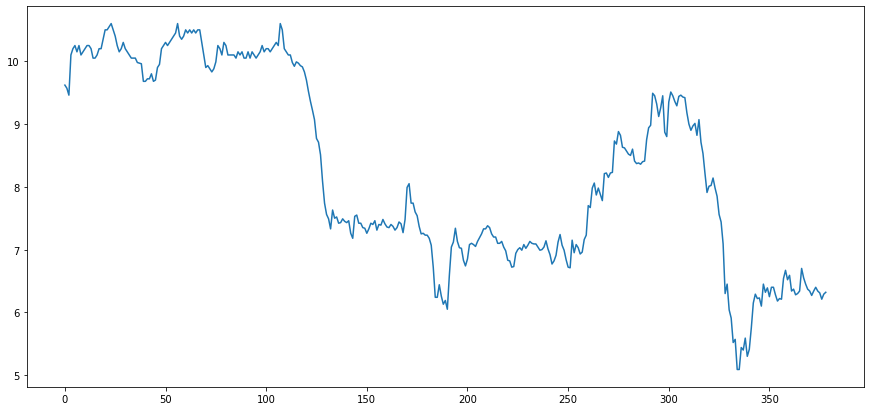

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
(292, 10) (292,) (27, 10) (27,)
input data
select  3481   min  price
 畫圖 


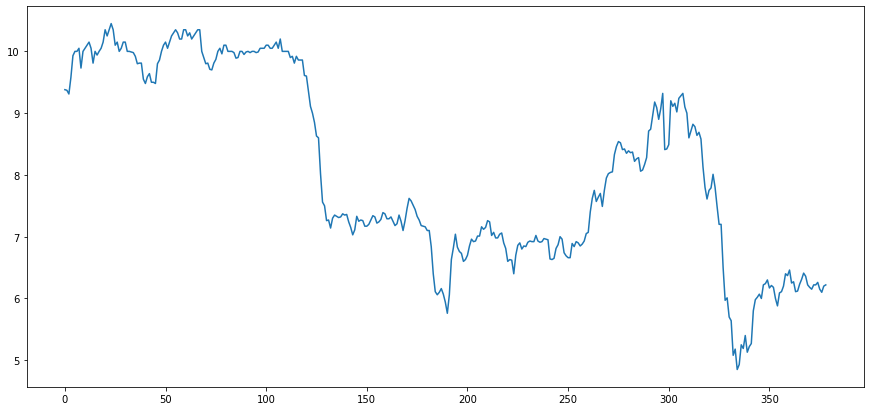

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
input data
select  3481   open  price
 畫圖 


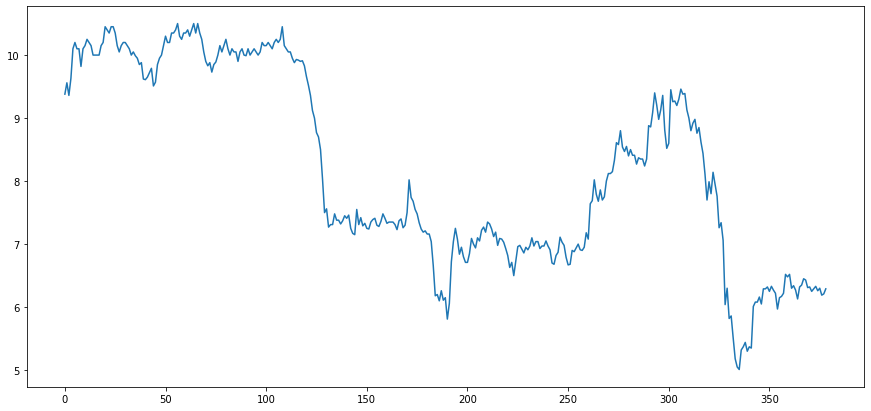

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
input data
select  3481   Trading_Volume  price
 畫圖 


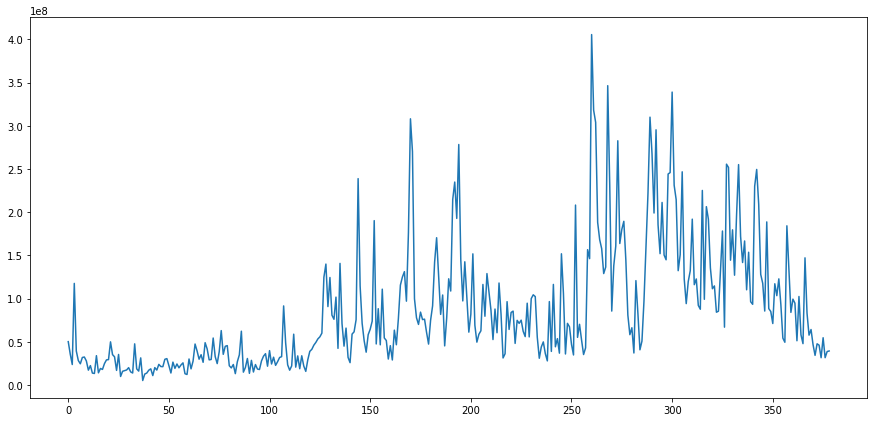

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
input data
select  3481   close  price
 畫圖 


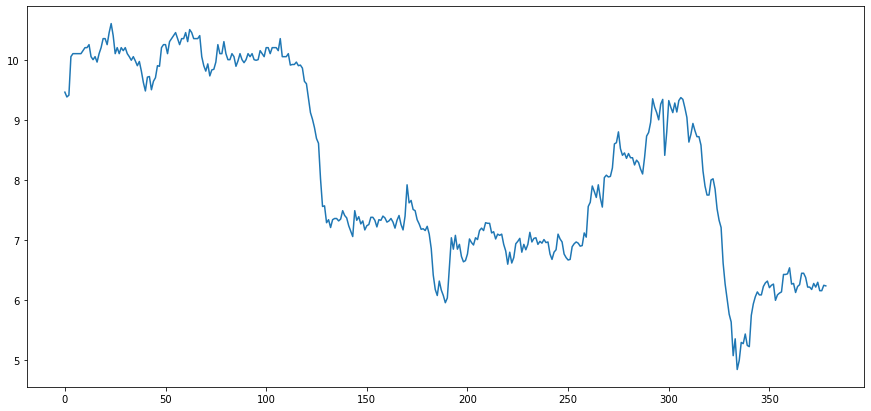

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
(292, 50) (292,) (27, 50) (27,)
input data
select  6456   Trading_Volume  price
 畫圖 


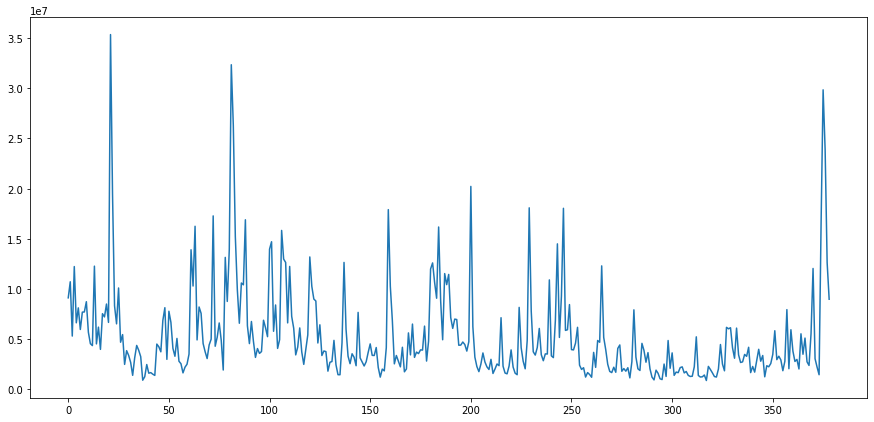

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
input data
select  8069   Trading_Volume  price
 畫圖 


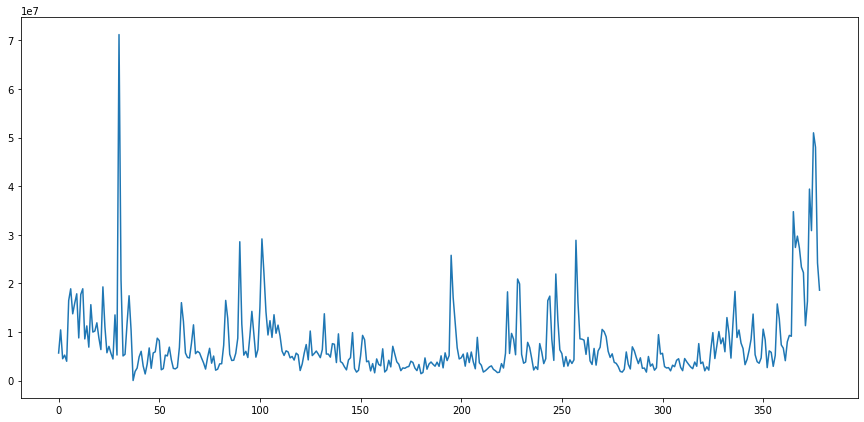

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
input data
select  2317   Trading_Volume  price
 畫圖 


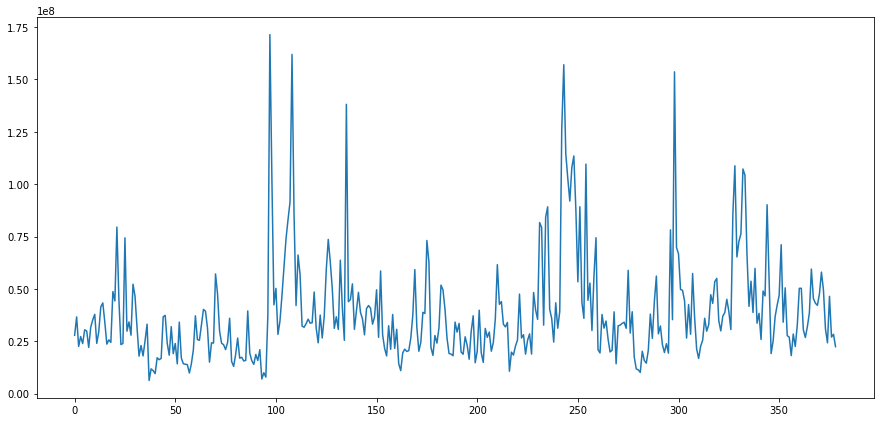

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
(292, 80) (292,) (27, 80) (27,)
input data
select  6456   max  price
 畫圖 


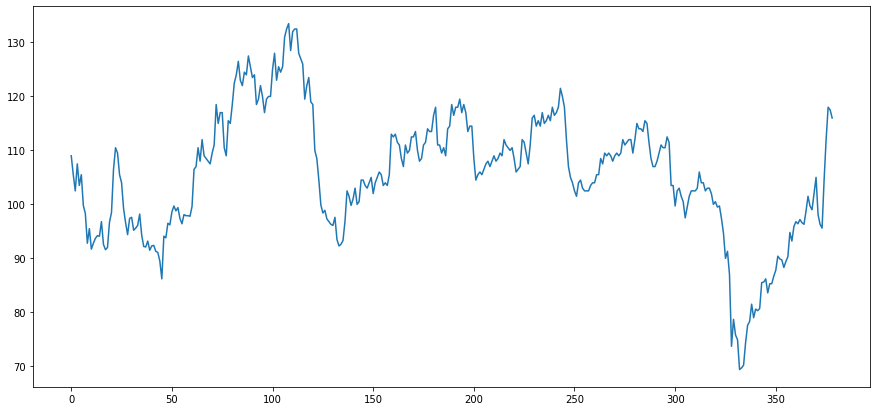

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
input data
select  8069   max  price
 畫圖 


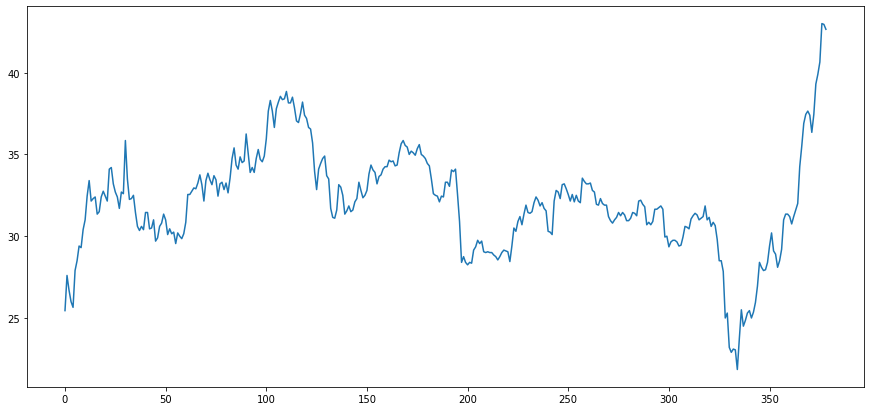

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
input data
select  2317   max  price
 畫圖 


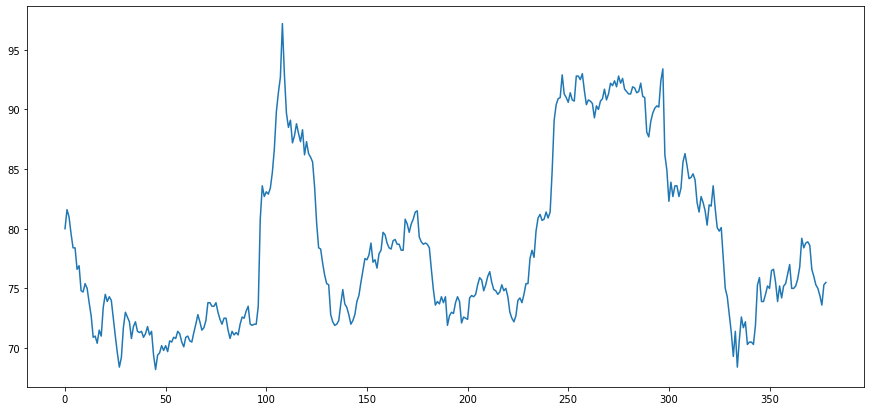

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
(292, 110) (292,) (27, 110) (27,)
input data
select  6456   open  price
 畫圖 


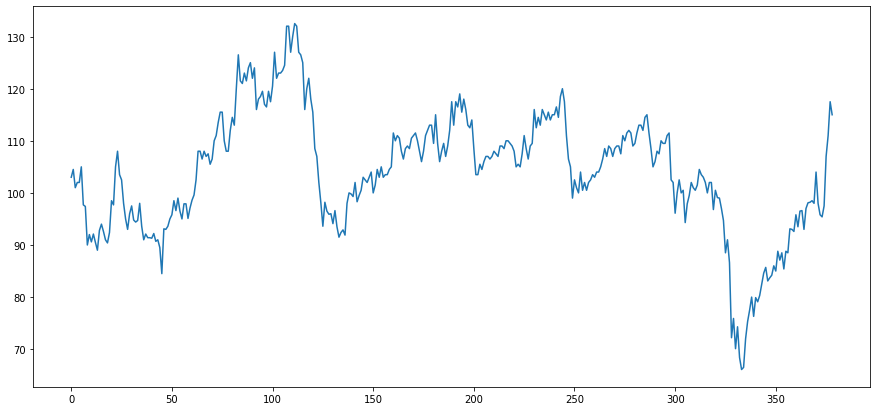

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
input data
select  8069   open  price
 畫圖 


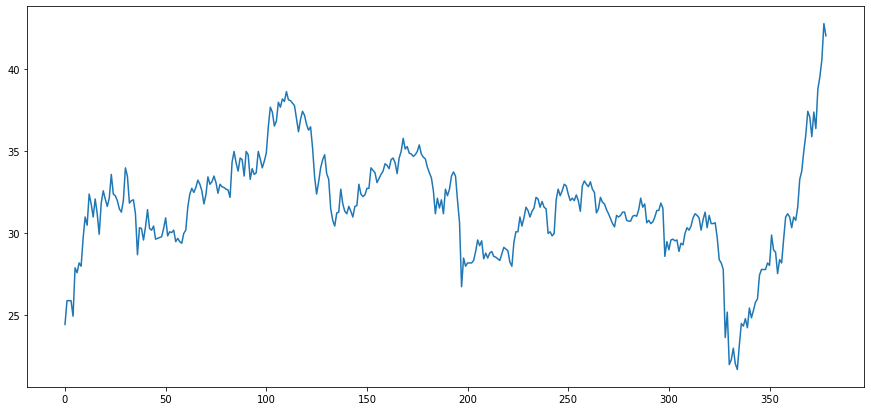

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
input data
select  2317   open  price
 畫圖 


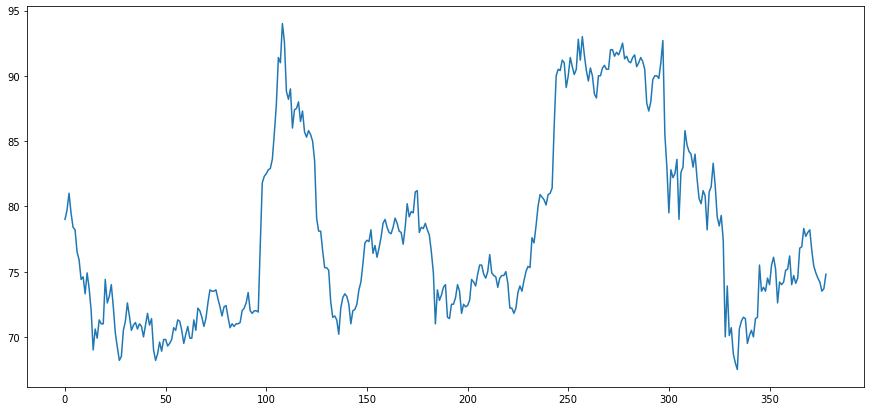

 取 80% data 當作 training data, 20% data 當作 testing data 做模型驗證 
切 data
切 data
(292, 140) (292,) (27, 140) (27,)
轉換成 LSTM 建模所需 data 的型態
(292, 1, 140) (292,) (27, 1, 140) (27,)
 歸一化 
 OK 
設定參數
建立 DL 模型，使用 RNN 常見的 GRU and LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 768)            2792448   
_________________________________________________________________
batch_normalization_7 (Batch (None, 1, 768)            3072      
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 768)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 512)            2623488   
_________________________________________________________________
batch_normalization_8 (Batch (None, 1, 512)            2048      
____________________________________________________

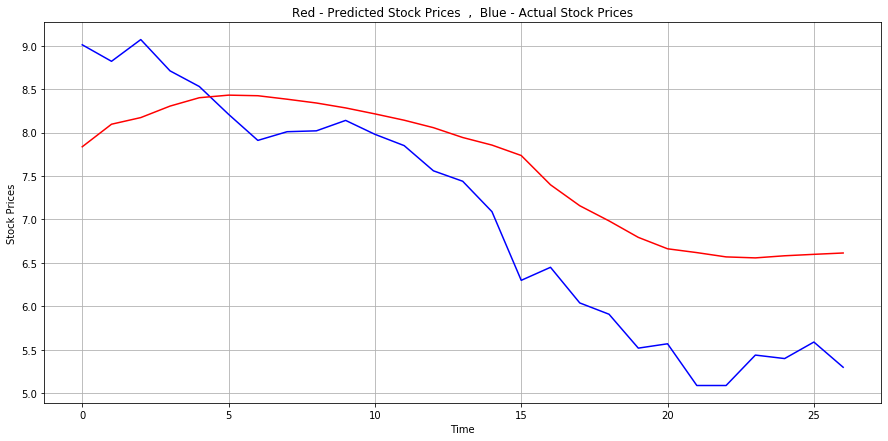

In [8]:
# reshape into X=t and Y=t+5
n_features = 10
future_days = 1

# 目標參數 , a
tr, te = input_data(3481,'max')
trainX, trainY = process_data(tr , n_features,future_days)
testX, testY = process_data(te, n_features,future_days)
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

# 其他input
for b in ['min','open','Trading_Volume','close']:
    tr, te = input_data(3481,b)
    train_x, train_y = process_data(tr , n_features,future_days)
    test_x, test_y = process_data(te, n_features,future_days)
    trainX = np.hstack((trainX , train_x))
    #trainY.append(train_y,axis=1)
    testX = np.hstack((testX , test_x))
    #testY.append(test_y,axis=1)

print(trainX.shape , trainY.shape , testX.shape , testY.shape)

# 其他input
for a in [6456,8069,2317]:
    tr, te = input_data(a,'Trading_Volume')
    train_x, train_y = process_data(tr , n_features,future_days)
    test_x, test_y = process_data(te, n_features,future_days)
    trainX = np.hstack((trainX , train_x))
    #trainY.append(train_y,axis=1)
    testX = np.hstack((testX , test_x))
    #testY.append(test_y,axis=1)

print(trainX.shape , trainY.shape , testX.shape , testY.shape)

# 其他input
for a in [6456,8069,2317]:
    tr, te = input_data(a,'max')
    train_x, train_y = process_data(tr , n_features,future_days)
    test_x, test_y = process_data(te, n_features,future_days)
    trainX = np.hstack((trainX , train_x))
    #trainY.append(train_y,axis=1)
    testX = np.hstack((testX , test_x))
    #testY.append(test_y,axis=1)

print(trainX.shape , trainY.shape , testX.shape , testY.shape)

# 其他input
for a in [6456,8069,2317]:
    tr, te = input_data(a,'open')
    train_x, train_y = process_data(tr , n_features,future_days)
    test_x, test_y = process_data(te, n_features,future_days)
    trainX = np.hstack((trainX , train_x))
    #trainY.append(train_y,axis=1)
    testX = np.hstack((testX , test_x))
    #testY.append(test_y,axis=1)

print(trainX.shape , trainY.shape , testX.shape , testY.shape)


# lstm need input to have 3 dimensions
print('轉換成 LSTM 建模所需 data 的型態')
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape , trainY.shape , testX.shape , testY.shape)

print(' 歸一化 ')
#scaler = MinMaxScaler(feature_range=(0, 1))
#trainX = scaler.fit_transform(trainX)
#testX = scaler.transform(testX)
trainX = np.log(np.log(trainX))
testX = np.log(np.log(testX))
print(' OK ')



'''  set up DL model '''
print('設定參數')
filepath="stock_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

print('建立 DL 模型，使用 RNN 常見的 GRU and LSTM')
model = Sequential()
model.add(LSTM(256*3 , input_shape = (1 , trainX.shape[2]) , return_sequences=True))
model.add(normalization.BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(256*2, return_sequences=True))
model.add(normalization.BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(128*1 , return_sequences=True))
model.add(normalization.BatchNormalization())
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(64*3 ,  activation = 'relu'))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(32 ,  activation = 'relu'))
model.add(Dense(15 ,  activation = 'relu'))
model.add(Dense(1))
model.summary()

#model.load_weights('/home/linsam/job/stock_weight.h5')
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])
print('training')
history = model.fit(trainX, trainY, epochs=500 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))
print(' save weight ')
model.save_weights('stock_weight.h5')


print('計算 error')
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

tem = model_score(model, trainX, trainY , testX, testY)


pred = model.predict(testX)
#pred = scaler.inverse_transform(pred)
#pred = np.exp(pred)
print('\n Predicted Stock Prices')
print( pred )

testY2 = testY.reshape(testY.shape[0] , 1)
#testY2 = scaler.inverse_transform(testY2)
print('\n Actual Stock Prices ')
print( testY2 )

print('畫圖')
print("\nRed - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(testY2 , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices')
plt.grid(True)
plt.show()


 Predicted Stock Prices
[[ 9.985014 ]
 [ 9.999817 ]
 [10.034955 ]
 [10.046144 ]
 [10.052029 ]
 [10.04457  ]
 [10.03641  ]
 [10.034374 ]
 [10.042256 ]
 [10.039761 ]
 [10.0414505]
 [10.037641 ]
 [10.041866 ]
 [10.040685 ]
 [10.052261 ]
 [10.055307 ]
 [10.052807 ]
 [10.033764 ]
 [10.029852 ]
 [10.0276985]
 [10.03671  ]
 [10.027233 ]
 [10.039644 ]
 [10.034963 ]
 [10.040905 ]
 [10.017235 ]
 [10.023954 ]
 [10.015223 ]
 [ 9.974224 ]
 [ 9.902983 ]
 [ 9.904267 ]
 [ 9.853585 ]
 [ 9.933328 ]
 [ 9.8759365]
 [ 9.877423 ]
 [ 9.893784 ]
 [ 9.887314 ]
 [ 9.885199 ]
 [ 9.923318 ]
 [ 9.937115 ]
 [ 9.940648 ]
 [ 9.972227 ]
 [ 9.98507  ]
 [ 9.993909 ]
 [10.002075 ]
 [10.021633 ]
 [10.0318775]
 [10.045267 ]
 [10.040721 ]
 [10.039751 ]
 [10.035991 ]
 [10.044029 ]
 [10.04321  ]
 [10.056187 ]
 [10.060085 ]
 [10.055977 ]
 [10.048519 ]
 [10.043645 ]
 [10.046854 ]
 [10.041241 ]
 [10.024608 ]
 [10.005046 ]
 [ 9.99285  ]
 [ 9.980604 ]
 [ 9.958496 ]
 [ 9.93976  ]
 [ 9.923072 ]
 [ 9.921539 ]
 [ 9.892799 ]
 [ 9.9036

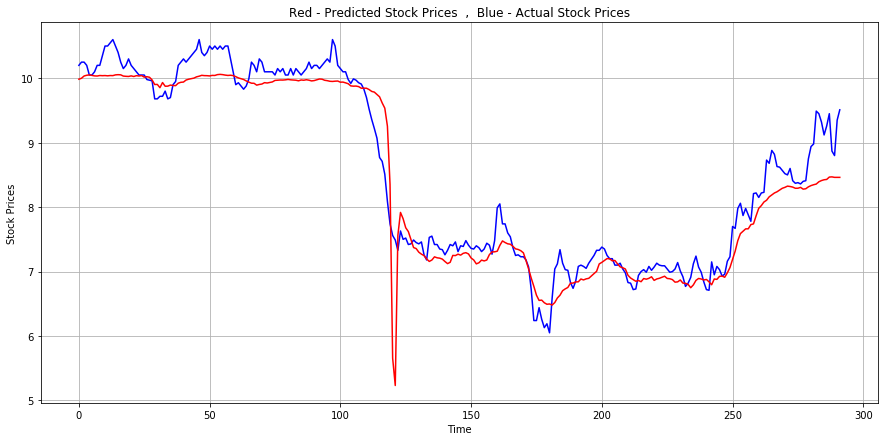

In [9]:
pred = model.predict(trainX)
#pred = scaler.inverse_transform(pred)
#pred = np.exp(pred)
print('\n Predicted Stock Prices')
print( pred )

trainY2 = trainY.reshape(trainY.shape[0] , 1)
#testY2 = scaler.inverse_transform(testY2)
print('\n Actual Stock Prices ')
print( trainY2 )

print('畫圖')
print("\nRed - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY2 , 'b')
plt.plot(pred , 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices')
plt.grid(True)
plt.show()